# Questão 1

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Funções

In [69]:
def f(t, y):
    return (t - 3.2) * y + 8 * t * np.exp((t - 3.2) ** 2 / 2) * np.cos(4 * t ** 2)

#Com constante de condição inicial
def analitica(t, y0, t0):
    E = 0.75 * np.exp((t - 3.2) ** 2 / 2) - np.sin(4 * t0**2)
    y_constante = np.exp((t - 3.2) ** 2 / 2) * np.sin(4 * t**2) + E
    y = np.exp((t - 3.2) ** 2 / 2) * (np.sin(4 * t**2))
    return y, y_constante

### Preditor-Corretor (B2/M2)

In [34]:
def bash_moulton2(t, y0, h):
    y = np.zeros(len(t))
    y[0] = y0

    K1 = f(t[0], y[0])
    y[1] = y[0] + 0.5 * h * K1

    for i in np.arange(1, len(t) - 1):
        # Bashforth-Euler Predictor (2 passos)
        y_pred = y[i] + 0.5 * h * (3 * f(t[i], y[i]) - f(t[i - 1], y[i - 1]))
        # Moulton-Euler Corrector (2 passos)
        y[i + 1] = y[i] + 0.5 * h * (f(t[i], y_pred) + f(t[i - 1], y[i - 1]))

    return y

### Preditor-Corretor (B3/M3)

In [35]:
# Método de Runge-Kutta de 4ª ordem para um único passo
def rk4_step(f, t, y, h):
    k1 = h * f(t, y)
    k2 = h * f(t + 0.5 * h, y + 0.5 * k1)
    k3 = h * f(t + 0.5 * h, y + 0.5 * k2)
    k4 = h * f(t + h, y + k3)
    return y + (k1 + 2 * k2 + 2 * k3 + k4) / 6

# # Preditor-Corretor
def bash_moulton3(t, y0, h):
    y = np.zeros(len(t))
    y[0] = y0
    
    for i in range(0, 2):
        y[i + 1] = rk4_step(f, t[i], y[i], h)
    
    K1 = f(t[1], y[1])
    K2 = f(t[0], y[0])
    
    for i in range(2, len(t) - 1):
        K3 = K2
        K2 = K1
        K1 = f(t[i], y[i])
        # Adams-Bashforth Predictor
        y_pred = y[i] + h * (23 * K1 - 16 * K2 + 5 * K3) / 12
        K0 = f(t[i + 1], y_pred)
        # Adams-Moulton Corrector
#         y[i + 1] = y[i] + h * (9 * K0 + 19 * K1 - 5 * K2 + K3) / 24
        y[i + 1] = y[i] + h * (5 * K0 + 8 * K1 - K2) / 12
    return y

### Preditor-Corretor (B4/M4)

In [36]:
def bash_moulton4(t, y0, h):
    y = np.zeros(len(t))
    y[0] = y0
    
    for i in range(0, 3):
        y[i + 1] = rk4_step(f, t[i], y[i], h)
        
    K1 = f(t[1], y[1])
    K2 = f(t[0], y[0])
    
    for i in range(3, len(t) - 1):
        K3 = K2
        K2 = K1
        K1 = f(t[i], y[i])
        K1 = f(t[i], y[i])
        K0 = f(t[i + 1], y[i + 1])
        y_pred = y[i] + h * (55 * K0 - 59 * K1 + 37 * K2 - 9 * K3) / 24
        # Adams-Moulton 4 passos
        K0 = f(t[i + 1], y_pred)
        
        y[i + 1] = y[i] + h * (9 * K0 + 19 * K1 - 5 * K2 + K3) / 24 

    return y

### Parâmetros e Condições Iniciais

In [37]:
# Parâmetros
y0 = 0.75
t0 = 0
tf = 6
N = 300
h = (tf - t0) / N
t = np.linspace(t0, tf, N + 1)

In [70]:
B2M2 = bash_moulton2(t, y0, h)
B3M3 = bash_moulton3(t, y0, h)
B4M4 = bash_moulton4(t, y0, h)
analitic1, analitic2 = analitica(t, y0, t0)

In [71]:
#Dataframe
results_df = pd.DataFrame.from_dict({
    'Tempo': t,
    'B2/M2': B2M2,
    'B3/M3': B3M3,
    'B4/M4': B4M4,
    'Analítica': analitic1,
    'Analítica_Constante': analitic2
}, orient = 'index')
results_df = results_df.transpose()
results_df

,Tempo,B2/M2,B3/M3,B4/M4,Analítica,Analítica_Constante
0,0.00,0.750000,0.750000,0.750000,0.000000,125.501527
1,0.02,0.726000,0.954834,0.954834,0.251188,117.995795
2,0.04,0.907577,1.603443,1.603443,0.943023,111.454340
3,0.06,1.543733,2.612867,2.612295,1.992198,105.756077
4,0.08,2.558025,3.910026,3.963666,3.326524,100.793920
...,...,...,...,...,...,...
296,5.92,30.033026,37.566768,36.074669,37.460665,67.771884
297,5.94,32.591153,11.183752,8.443790,10.032607,42.044834
298,5.96,6.030110,-28.075490,-31.070055,-29.556739,4.265479
299,5.98,-29.676287,-46.727604,-48.681911,-47.431100,-11.682256


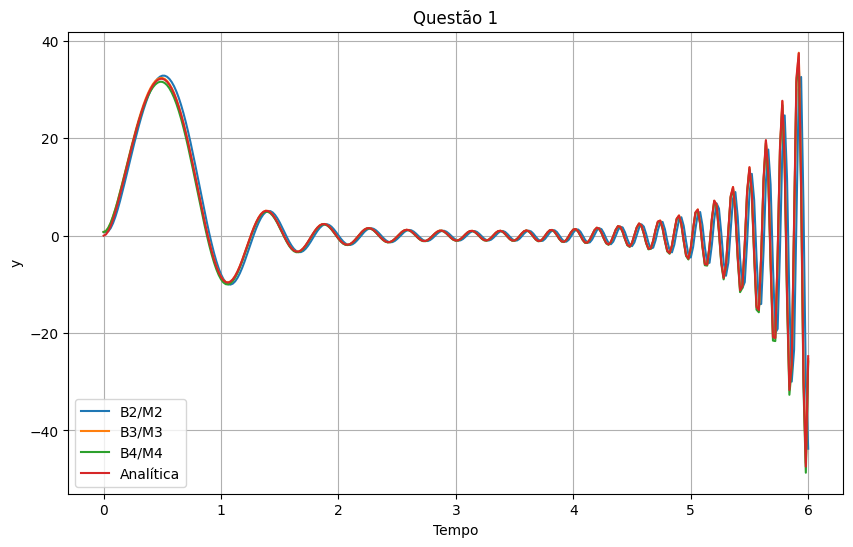

In [72]:

plt.figure(figsize=(10, 6))
plt.plot(results_df['Tempo'], results_df['B2/M2'], label='B2/M2')
plt.plot(results_df['Tempo'], results_df['B3/M3'], label='B3/M3')
plt.plot(results_df['Tempo'], results_df['B4/M4'], label='B4/M4')
plt.plot(results_df['Tempo'], results_df['Analítica'], label='Analítica')
plt.xlabel('Tempo')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.title('Questão 1')
plt.show()

In [74]:
def rmse(y_numerico, y_analitico):
    return np.sqrt(np.mean((y_numerico - y_analitico)**2))
b2m2 = rmse(B2M2, analitic1)
b3m3 = rmse(B3M3, analitic1)
b4m4 = rmse(B4M4, analitic1)
print(f"RMSE B2/M2: {b2m2}")
print(f"RMSE B3/M3: {b3m3}")
print(f"RMSE B4/M4: {b4m4}")

RMSE B2/M2: 5.089692657056168
RMSE B3/M3: 0.22286443697347122
RMSE B4/M4: 0.3817360189952684
